In [1]:
%matplotlib inline
import config
import models
import keras
import util
from keras.callbacks import ModelCheckpoint
import os

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
input_shape = (32, 32)
batch_size = 32

train_data = models.getTrainData(batch_size, data_aug=True, target_size=input_shape)
val_data = models.getValData(batch_size, data_aug=True, target_size=input_shape)
test_data = models.getTestData(target_size = (32, 32))

Found 6149 images belonging to 102 classes.
Found 1020 images belonging to 102 classes.
Found 1020 images belonging to 102 classes.


In [3]:
model = models.baseline_model()
model.name
model.load_weights('trained/baseline_model_best.hdf5')

In [4]:
import pickle
with open(config.trained_dir + 'baseline_model_history', 'rb') as file_pi:
    h = pickle.load(file_pi)

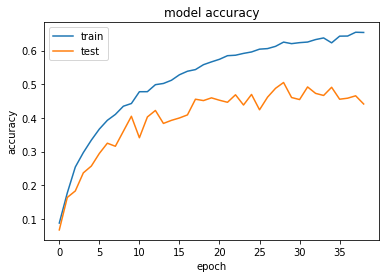

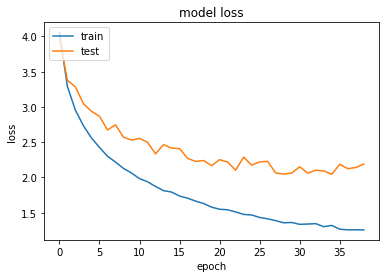

In [5]:
import matplotlib.pyplot as plt
plt.plot(h['acc'])
plt.plot(h['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])
print(model.metrics_names)
model.evaluate_generator(generator=test_data, use_multiprocessing=True, workers=6)

['loss', 'acc']


[2.369158768186382, 0.4254901959615595]

In [7]:
import matplotlib.image as mpimg
from skimage.transform import resize
len(os.listdir('./data/sorted/test'))
img = mpimg.imread('./data/sorted/test/0/image_06744.jpg')
img_resize = resize(img, (32, 32))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


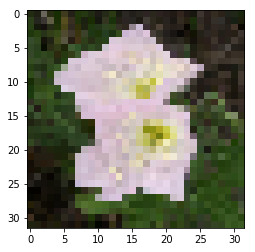

In [8]:
plt.imshow(img_resize)

In [9]:
X_test, y_test = util.load_process_data('./data/sorted/test/', (32, 32), True)

In [18]:
y_test[10]

95

In [16]:
y_test_enc = np.zeros((1020, 102))
for i in range(1020):
    y_test_enc[i, y_test[i]] = 1
    

In [17]:
y_test_enc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
import numpy as np
model.evaluate(np.array(X_test), y_test_enc)

1020/1020 [==============================] - 0s 436us/step


[12.155401970358456, 0.00980392156862745]

In [30]:
print(y[0:100])
print(y_test[0:100])

[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13]
[61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 68, 68, 68, 68, 68, 68, 68, 68, 68, 68, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35]


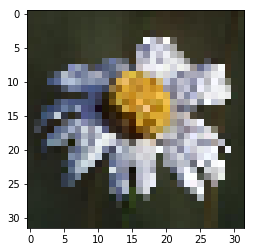

In [21]:
(x_, y_) = test_data.next()
plt.imshow(x_[0, :, :, :])

In [24]:
from keras.preprocessing.image import ImageDataGenerator
idg = ImageDataGenerator(rescale=1./255)
test_gen = idg.flow_from_directory(config.test_dir, target_size = (32,32), shuffle = False, batch_size = 1)

Found 1020 images belonging to 102 classes.


In [25]:
predictions = model.predict_generator(test_gen)

In [31]:
model.evaluate_generator(test_gen)

[2.3691585570095732, 0.42549019607843136]

In [32]:
(x_, y_) = test_gen.next()

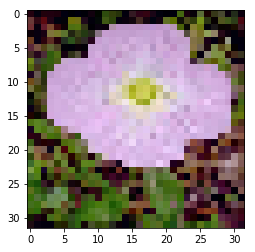

In [33]:
plt.imshow(x_[0,:,:,:])

In [39]:
model.predict(x_)

array([[1.3568769e-02, 5.1693460e-06, 2.5594122e-06, 1.3152057e-09,
        8.4082058e-13, 6.8483462e-07, 8.3766412e-05, 2.5765074e-05,
        7.7632852e-11, 2.6272076e-10, 5.0403032e-06, 1.8220000e-04,
        3.1412274e-02, 1.2939650e-03, 5.6228888e-05, 4.1215600e-09,
        1.3832015e-01, 4.5662669e-06, 5.6869637e-10, 2.3884309e-05,
        7.1257854e-11, 5.9992339e-10, 1.6831537e-04, 1.0449714e-02,
        4.3317298e-03, 7.1695416e-05, 1.6746915e-06, 7.0394920e-03,
        9.3903443e-05, 1.5533358e-03, 6.8895332e-08, 4.7122501e-02,
        1.8393108e-05, 1.5426915e-07, 6.3204643e-05, 1.7034603e-06,
        2.1101840e-09, 1.8456586e-04, 4.1456047e-10, 1.1332758e-03,
        2.7839671e-05, 2.4349360e-04, 1.2020446e-08, 1.0161422e-08,
        7.9924822e-09, 1.5888986e-03, 1.5664288e-08, 6.6223515e-12,
        2.6870200e-01, 4.1794730e-03, 1.1686752e-02, 9.3941493e-11,
        3.4506721e-03, 1.2037700e-08, 6.2608262e-07, 4.5360169e-09,
        2.6098955e-11, 7.8420165e-10, 1.4169582e

In [43]:
X_test[0].shape

(32, 32, 3)

In [57]:
def load_process_data(path, img_size = (224, 224), RESCALE = False):
    X = []
    y = []
    
    for n in os.listdir(path):
        p = os.path.join(path, n)
        for im in os.listdir(p):
            img = mpimg.imread(os.path.join(p, im))
            img_re = resize(img, img_size)
            if RESCALE:
                img_re = img_re / 255.0
            X.append(img_re)
            y.append(int(n))
    return X, y

In [58]:
X_test, y_test = load_process_data(path = './data/sorted/test', img_size = (32, 32))

In [61]:
y_test_enc = np.zeros((1020, 102))
for i in range(1020):
    y_test_enc[i, y_test[i]] = 1

In [89]:
model.evaluate(np.array(X_test), y_test_enc)

1020/1020 [==============================] - 0s 416us/step


[12.990626432381424, 0.01274509806843365]

In [90]:
img = plt.imread('./data/sorted/test/0/image_06741.jpg')
img = resize(img, (32, 32))

In [97]:
print(x_[0, :, :, :] - img)

[[[-7.15379230e-03 -8.55545320e-03 -1.20557559e-02]
  [ 1.37868808e-04  2.31917582e-10  6.89380017e-05]
  [ 1.80300317e-02  1.10294141e-03  1.11060514e-03]
  ...
  [-4.54963097e-03 -3.44669118e-03  9.65078175e-04]
  [ 6.54872019e-03  3.18627936e-03  3.48499657e-03]
  [ 2.08333449e-03  0.00000000e+00 -2.45097645e-03]]

 [[-8.04193113e-04 -2.06799846e-03 -3.71475044e-03]
  [-4.48833926e-03 -2.81096628e-03 -3.14031562e-03]
  [ 1.15196164e-02 -4.75643244e-03 -5.02450609e-03]
  ...
  [ 2.38206118e-03 -3.79900991e-03 -6.89252334e-05]
  [ 5.02451419e-03  7.06956211e-03  2.69608749e-03]
  [ 2.32843260e-02  8.19546731e-03  1.02251868e-02]]

 [[-1.67738636e-02 -2.47395794e-02 -1.83670164e-02]
  [-1.07996138e-03  0.00000000e+00  6.21936716e-03]
  [-2.36902209e-02 -1.24157392e-02 -6.24999538e-03]
  ...
  [ 1.12745144e-02 -9.42094427e-04  3.95986612e-03]
  [-1.01102059e-03 -1.03247507e-02 -6.84742647e-03]
  [-5.28491116e-03 -3.82956862e-04  8.42530529e-04]]

 ...

 [[-1.33731460e-02 -8.59371354e-03

In [76]:
temp = np.zeros((1, 32, 32, 3))
temp[0,:,:,:] = img

In [79]:
temp = np.array(X_test)

In [80]:
temp.shape

(1020, 32, 32, 3)

In [87]:
print(ttt)

[60 76 60 ... 37 97 20]
